### Name: Weona Lazarus
### Github Username: weonalazarus
### USC ID: 5318528720

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, pairwise
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.neighbors import KNeighborsRegressor

from tabulate import tabulate

In [2]:
df = pd.read_excel("../data/Folds5x2_pp.xlsx")
print(df.head(10))
print("\nThe shape of the dataset is", df.shape)

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
5  26.27  59.44  1012.23  58.77  443.67
6  15.89  43.96  1014.02  75.24  467.35
7   9.48  44.71  1019.12  66.43  478.42
8  14.64  45.00  1021.78  41.25  475.98
9  11.74  43.56  1015.14  70.72  477.50

The shape of the dataset is (9568, 5)


### (b) Exploring the data:
**i. How many rows are in this data set? How many columns? What do the rows and columns represent?**

Ans) The dataset has 9568 rows and 5 columns. The columns represent the features of the Combined Cycle Power Plant dataset which are:

1. AT: Ambient variables temperature
2. V: Exhaust Vacuum
3. AP: Ambient Pressure
4. RH: Relative Humidity
5. PE: Net hourly energy output

The rows represent the number of dta points collected over 6 years from 2006 to 2011, when the power plant was set to work with full load.


**ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.**

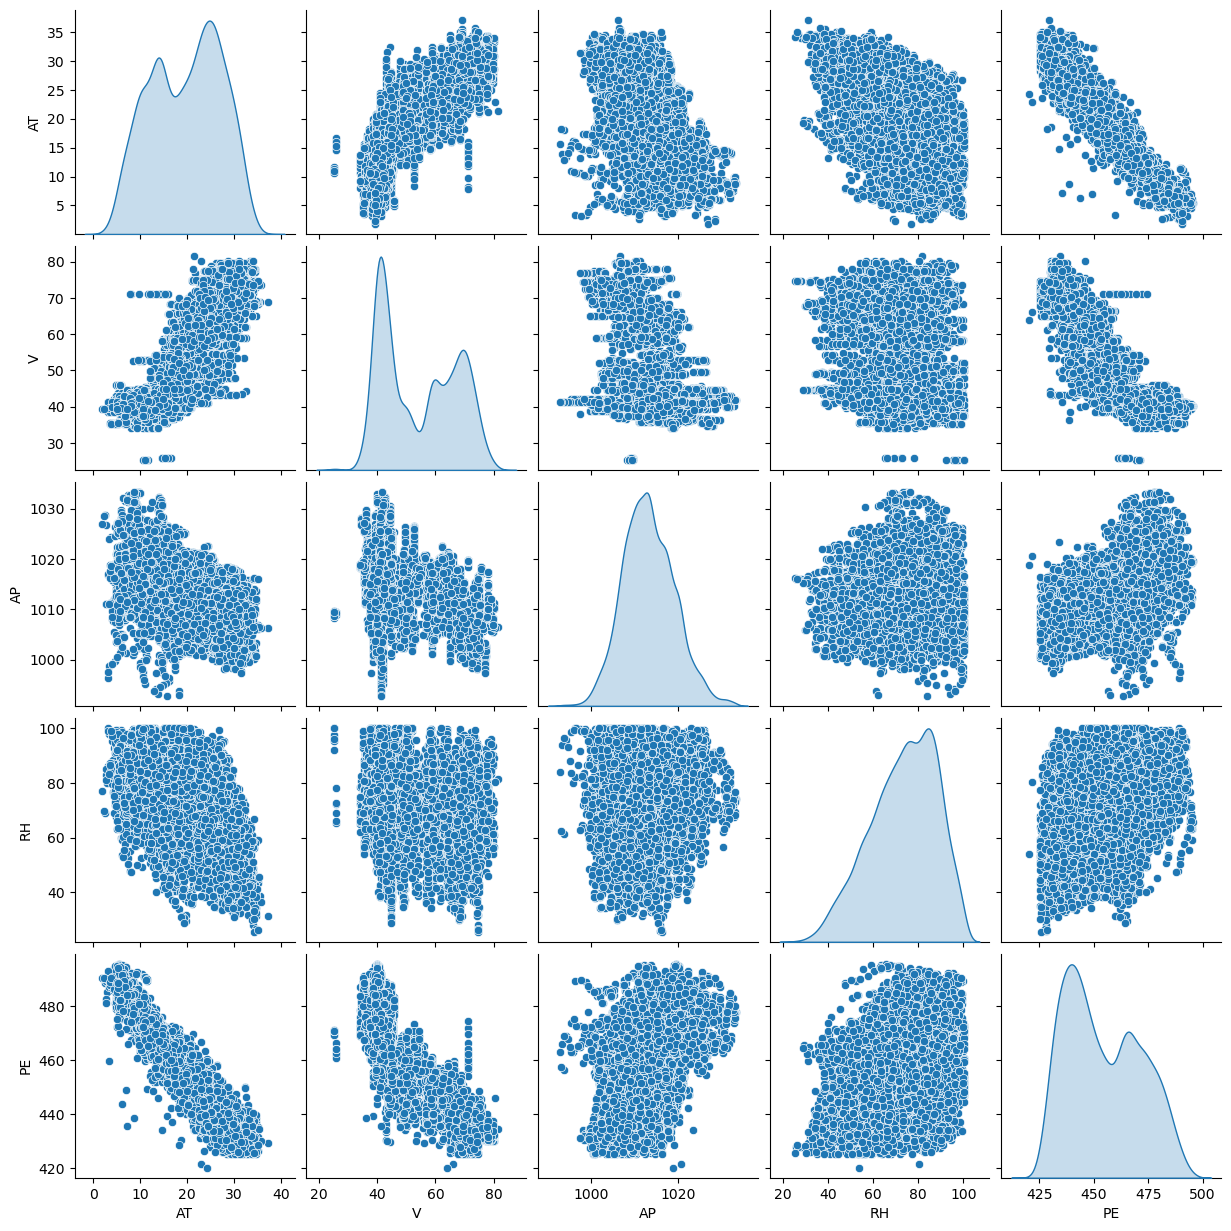

In [3]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Pairplot Observations:
AT and V have positive correlation with each other.

AT and V have negative correlation with PE.

AP and RH have borader plots with respect to PE indicating less correlation between the values.


**iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.**

In [4]:
mean = df.mean().round(2)
median = df.median().round(2)
first_quartile = df.quantile(0.25).round(2)
third_quartile = df.quantile(0.75).round(2)
range_values = (df.max() - df.min()).round(2)
interquartile_range = (third_quartile - first_quartile).round(2)


statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': range_values,
    '1st Quartile': first_quartile,
    '3rd Quartile': third_quartile,
    'Interquartile Range': interquartile_range
})

print(statistics_df)

       Mean   Median  Range  1st Quartile  3rd Quartile  Interquartile Range
AT    19.65    20.34  35.30         13.51         25.72                12.21
V     54.31    52.08  56.20         41.74         66.54                24.80
AP  1013.26  1012.94  40.41       1009.10       1017.26                 8.16
RH    73.31    74.97  74.60         63.33         84.83                21.50
PE   454.37   451.55  75.50        439.75        468.43                28.68


In [5]:
X = df.drop("PE", axis = 1)
Y = df["PE"]

### (c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

**ChatGPT:**
Prompt: How to fit a linear regression model using statmodels to all predictors
Response:
import statsmodels.api as sm
import pandas as pd

Assuming you have your dataset in a DataFrame `df`
Response variable: 'Y'
Predictors: All other columns (let's assume they are 'X1', 'X2', 'X3', etc.)

`response = 'Y'  # Replace with your actual response variable name
predictors = ['X1', 'X2', 'X3']  # Replace with your actual predictor names

Loop through each predictor and fit a simple linear regression model
for predictor in predictors:
    # Prepare the data
    X = df[predictor]  # Current predictor
    y = df[response]   # Response variable
    
    # Add constant (intercept) to the predictor
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Print the summary of the model
    print(f"Simple Linear Regression for {predictor} predicting {response}")
    print(model.summary())
    print("\n\n")`


In [6]:
linear_coefficients = []
def linear_regression(predictor, Y, data):
    X = data[predictor]
    y = data[Y]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    return model

def find_outliers(model, data, threshold_factor = 4):
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]
    
    threshold = threshold_factor / len(data)
    
    outliers = np.where(cooks_d > threshold)[0]
    count_outliers = len(outliers)
    print(f"Number of Outliers based on Cook's Distance: {count_outliers}")
    return outliers

def remove_outliers(data, outliers):
    return data.drop(index = outliers)

def plot_linear_regression(predictor, Y, data):
    plt.figure(figsize = (8,6))
    sns.regplot(x= predictor, y = Y, data = data, line_kws= {'color': "red"})
    plt.title("Regression plot")
    plt.show()

def regression_analysis(predictor, Y, data):
    model = linear_regression(predictor, Y, data)
    print(model.summary())
    
    plot_linear_regression(predictor, Y, data)
    
    linear_coefficients.append(model.params[0])
    outliers = find_outliers(model,data)
    
    if len(outliers) > 0:
        data_clean = remove_outliers(data, outliers)
        
        model_clean = linear_regression(predictor, Y, data_clean)
        print(model_clean.summary())
        
        plot_linear_regression(predictor, Y, data_clean)
        return model_clean
    else:
        print("No outliers")
        return model

### AT vs PE

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

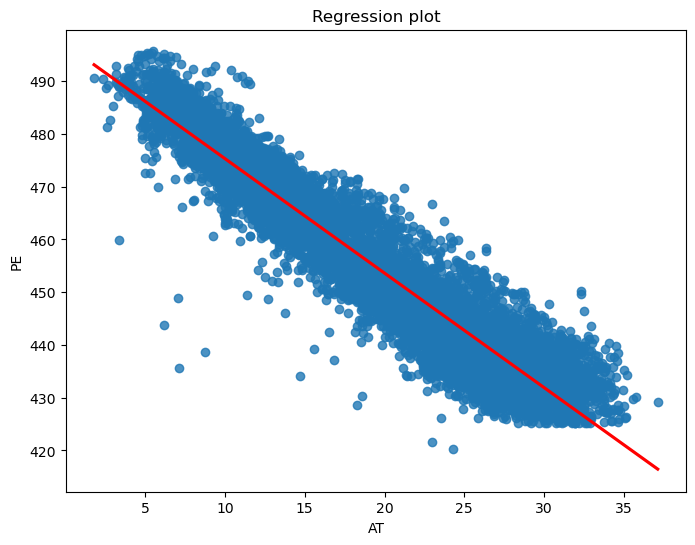

C:\Users\weona\AppData\Local\Temp\ipykernel_28144\944035980.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coefficients.append(model.params[0])


Number of Outliers based on Cook's Distance: 416
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

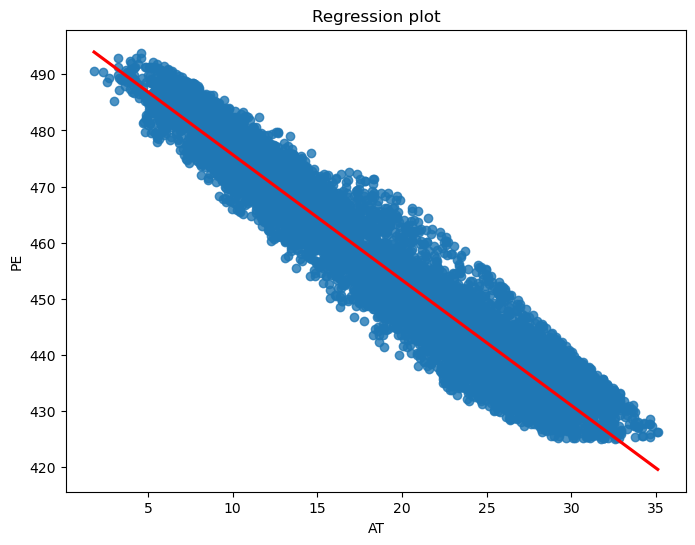

In [7]:
regression_analysis("AT", "PE", df)

Inference: 

1. P-value for the predictor is 0.000 which is statistically significant, indicating AT is a good predictor of PE.
2. Number of outliers which can be removed are: 416
3. R-squared value for the data without outliers is 0.92 as compared to 0.899

### V vs PE

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:02   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

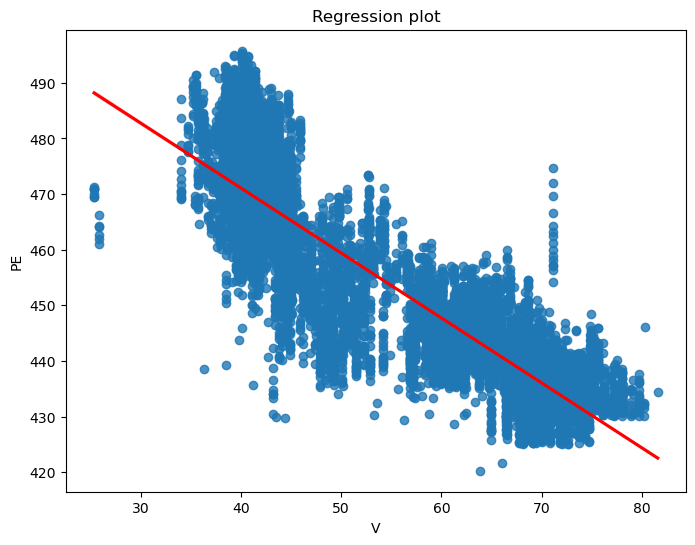

C:\Users\weona\AppData\Local\Temp\ipykernel_28144\944035980.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coefficients.append(model.params[0])


Number of Outliers based on Cook's Distance: 423
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:03   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

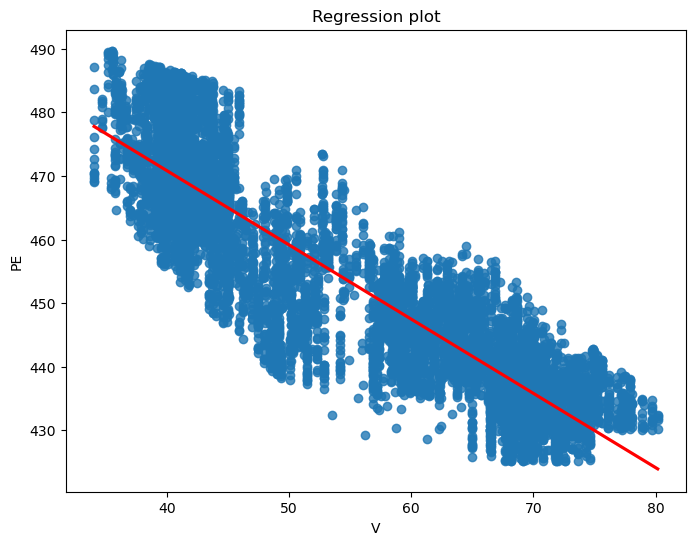

In [8]:
regression_analysis("V", "PE", df)

Inference:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that V is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 423
3. R-squared value for the data without outliers is 0.798 as compared to the earlier value of 0.757, indicating that the outliers were indeed outliers

### AP vs PE

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:04   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

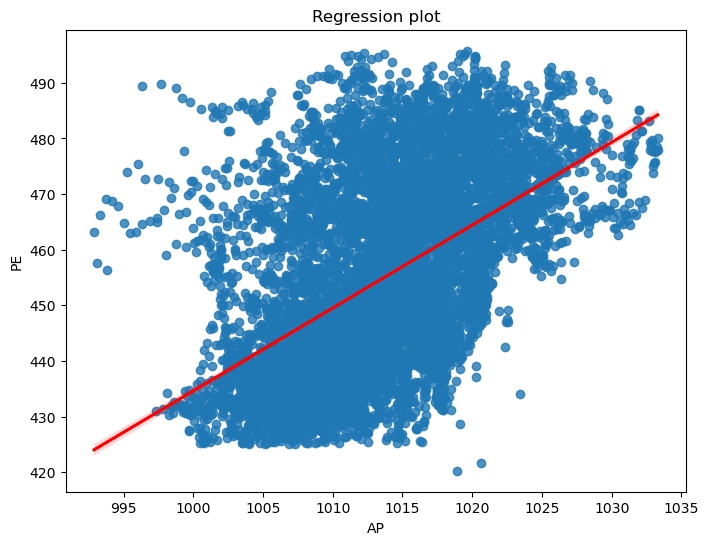

C:\Users\weona\AppData\Local\Temp\ipykernel_28144\944035980.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coefficients.append(model.params[0])


Number of Outliers based on Cook's Distance: 300
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:05   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

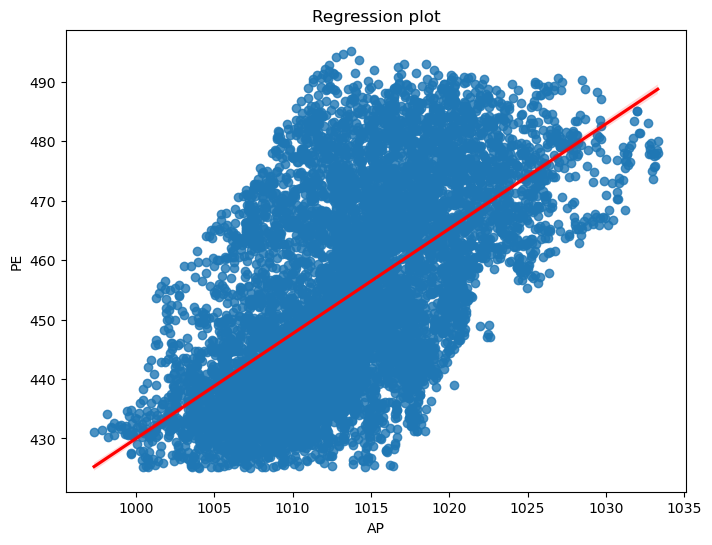

In [9]:
regression_analysis("AP", "PE", df)

Inference:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that AP is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 300
3. R-squared value for the data without outliers is 0.361 as compared to the earlier value of 0.269, indicating that the outliers were indeed outliers.

### RH vs PE

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:06   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

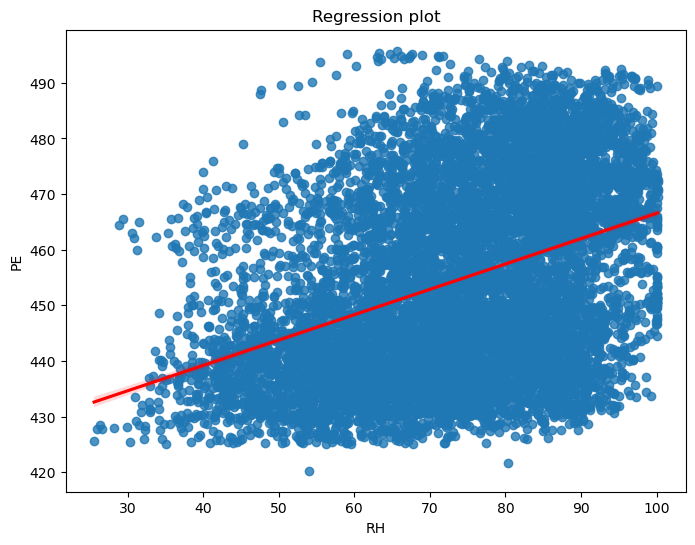

C:\Users\weona\AppData\Local\Temp\ipykernel_28144\944035980.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coefficients.append(model.params[0])


Number of Outliers based on Cook's Distance: 249
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:07   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

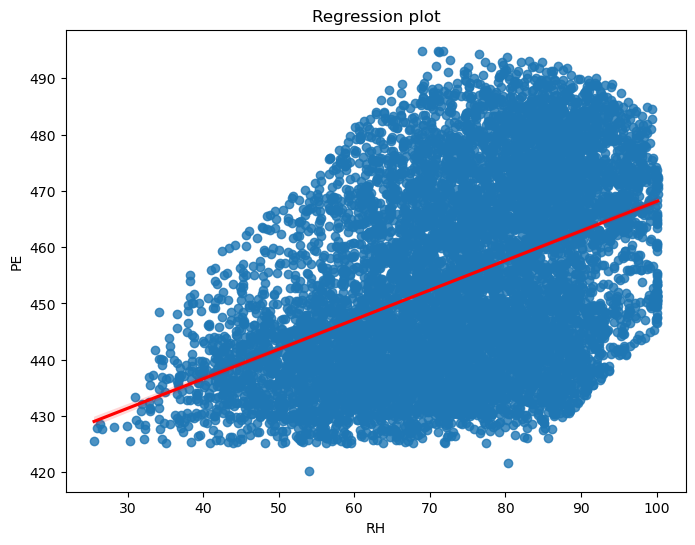

In [10]:
regression_analysis("RH", "PE", df)

Inference: 
1) P-value for the predictor is 0.000 which is statistically significant, indicating that RH is a good predictor of PE.
2) Number of Outliers in the data which can be removed are 249
3) R-Squared value for the data without outliers is 0.196 as compared to the earlier value of 0.152, indicating that the outliers were indeed outliers.

### (d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj= 0?

In [11]:
X = df.drop(["PE"], axis = 1)
Y = df["PE"]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:08   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Inference:
1) The Null hypothesis can be rejected for all the variables since p-value for all of them is ~ 0, indicating that all the predictors are statistically significant.
2) R-squared value is greater for this model as compared to the individual predictor models, indicating this model is a better predictor for the PE value.

### (e) How do your results from 1c compare to your results from 1d?
Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis

C:\Users\weona\AppData\Local\Temp\ipykernel_28144\1524013351.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.scatter(linear_coefficients[0], multiple_coefficients[0], label=f"AT [{linear_coefficients[0]}, {multiple_coefficients[0]}]")
C:\Users\weona\AppData\Local\Temp\ipykernel_28144\1524013351.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.scatter(linear_coefficients[1], multiple_coefficients[1], label=f"V [{linear_coefficients[1]}, {multiple_coefficients[1]}]")
C:\Users\weona\AppData\Local\Temp\ipykernel_28144\1524013351.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprec

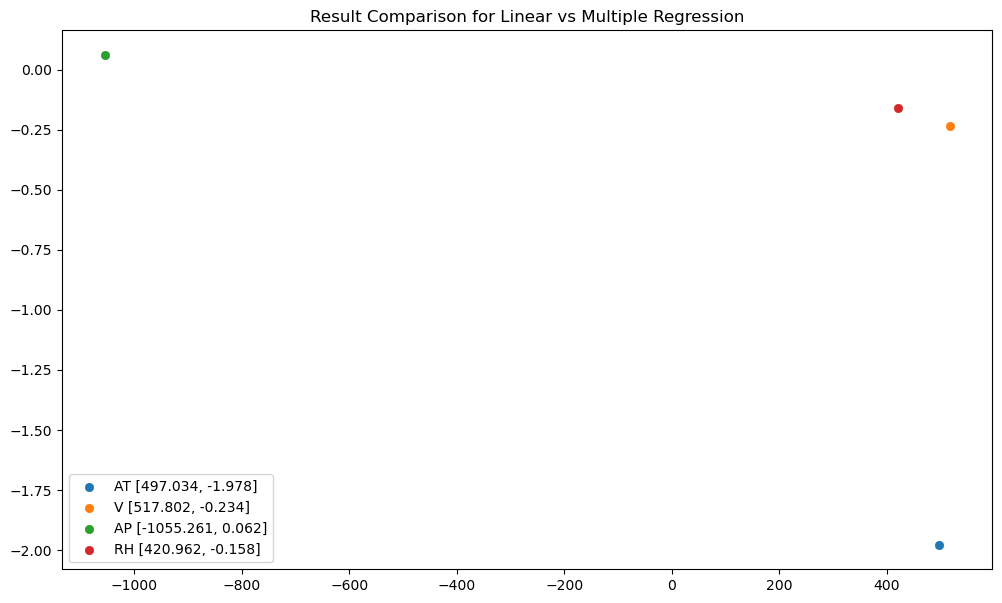

In [12]:
linear_coefficients = np.asarray(linear_coefficients).round(3)
multiple_coefficients = model.params[1:5].round(3)
fig, axes = plt.subplots(figsize=(12, 7))
with plt.style.context('ggplot'):
    axes.scatter(linear_coefficients[0], multiple_coefficients[0], label=f"AT [{linear_coefficients[0]}, {multiple_coefficients[0]}]")
    axes.scatter(linear_coefficients[1], multiple_coefficients[1], label=f"V [{linear_coefficients[1]}, {multiple_coefficients[1]}]")
    axes.scatter(linear_coefficients[2], multiple_coefficients[2], label=f"AP [{linear_coefficients[2]}, {multiple_coefficients[2]}]")
    axes.scatter(linear_coefficients[3], multiple_coefficients[3], label=f"RH [{linear_coefficients[3]}, {multiple_coefficients[3]}]")
axes.set_title(f"Result Comparison for Linear vs Multiple Regression")
axes.legend()
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, fit a model of the form

Y = β0 + β1X + β2X2 + β3X3 + $\epsilon$

In [13]:

def polyfeatures(X, Y, data):
    X = data[X].values.reshape(-1,1)
    y = data[Y]

    polynomial = PolynomialFeatures(degree=3)
    X_poly = polynomial.fit_transform(X)
    
    model = sm.OLS(y, X_poly).fit()
    print(model.summary())

    return pd.DataFrame([model.params])


In [14]:
coefs = polyfeatures("AT", "PE", df)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

Inference: 

The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of AT with PE.

In [15]:
def polyfeatures(X, Y, data):
    
    X_values = data[X].values.reshape(-1, 1) 
    y_values = data[Y] 
   
    polynomial = PolynomialFeatures(degree=3)
    X_poly = polynomial.fit_transform(X_values) 
    
    model = sm.OLS(y_values, X_poly).fit()
    
    
    print(model.summary())
    
    
    return pd.DataFrame([model.params])


In [16]:
print(polyfeatures("AT", "PE", df))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

Inference: 

The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of AT with PE.

In [17]:
print(polyfeatures("V", "PE", df))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of AT with PE.

In [18]:
print(polyfeatures("AP", "PE", df))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [19]:
print(polyfeatures("RH", "PE", df))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

### (g) Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant

In [20]:
import statsmodels.formula.api as smf
interaction = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + V:AP + V:RH + AP:RH'
model = smf.ols(formula = interaction, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.554e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -27569.
No. Observations:                9568   AIC:                         5.516e+04
Df Residuals:                    9558   BIC:                         5.523e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    812.7893     76.292     10.654      0.0

Inference: 

The V, AP, RH terms are statistically significant since their p-values are < 0.005
The interaction terms between (AT,V), (AT, RH), (V, AP), (AP, RH) are statistically significant since their p-values are < 0.005

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response?
Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms)

**Chatgpt:**
Prompt: How to improve models by using the interaction terms"
Response: Improving a regression model using interaction terms involves adding product terms between different predictor variables to capture how the relationship between one predictor and the response changes depending on the value of another predictor. Here's how you can do it:

Steps to Improve the Model with Interaction Terms:
Identify Potential Interactions: Think about the variables that might have an interdependent effect on the response. For example, in a model with variables like age and education, you might think that the effect of education on salary depends on the age of the individual.

Create Interaction Terms: Interaction terms are the product of two or more variables. For example, if you have two variables X1 and X2, their interaction term would be X1 * X2.

Add Interaction Terms to the Model: You can manually create interaction terms in your dataset or use built-in libraries that generate them for you.

In Statsmodels: You can directly specify interaction terms using formulas

Code:

import statsmodels.formula.api as smf

model = smf.ols('Y ~ X1 * X2', data=df).fit()

print(model.summary())



In [21]:

from sklearn.model_selection import train_test_split
mse = {}
X = df.drop("PE", axis = 1)
Y = df["PE"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)


In [22]:
from sklearn.metrics import mean_squared_error
formula = 'PE ~ AT + V + AP + RH'
model = smf.ols(formula=formula, data =df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_train = mean_squared_error(y_train_predict, y_train)



In [23]:
from sklearn.metrics import mean_squared_error
formula = 'PE ~ AT + V + AP + RH'
model = smf.ols(formula=formula, data =df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_train = mean_squared_error(y_train_predict, y_train)
mse_test = mean_squared_error(y_test_predict, y_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

mse["Predictors, Interactions and Quadratic Terms Linear Regression"] = [mse_train, mse_test]


Train MSE: 20.592037265461666
Test MSE: 21.176449329327156


In [24]:

formula = 'PE ~ AT + V + AP + RH'
model = smf.ols(formula=formula, data =df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_train = mean_squared_error(y_train_predict, y_train)
mse_test = mean_squared_error(y_test_predict, y_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

mse["Predictors for Linear Regression"] = [mse_train, mse_test]

Train MSE: 20.592037265461666
Test MSE: 21.176449329327156


In [25]:

formula = 'PE ~ AT + V + AP + RH + AT:V + AT:RH + AT:AP + V:AP + V:RH + AP:RH + np.power(AP,2) + np.power(AT,2) + np.power(V,2) + np.power(RH,2)'
model = smf.ols(formula=formula, data =df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_train = mean_squared_error(y_train_predict, y_train)
mse_test = mean_squared_error(y_test_predict, y_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

mse["Predictors, Interactions and Quadratic Terms Linear Regression"] = [mse_train, mse_test]


model.summary()

Train MSE: 17.900429655766636
Test MSE: 18.576028483906


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7503.7323   1207.276     -6.215      0.000   -9870.250   -5137.214
AT                 -5.7969      3.092     -1.875      0.061     -11.858       0.264
V                  -3.0443      1.498     -2.033      0.042      -5.980      -0.109
AP                 15.6284      2.341      6.677      0.000      11.040      20.216
RH                  3.9194      0.879      4.458      0.000       2.196       5.643
AT:V                0.0120      0.003      4.463      0.000       0.007       0.017
AT:RH              -0.0061      0.001     -4.056      0.000      -0.009      -0.003
AT:AP               0.0031      0.003      1.037      0.300      -0.003       0.009
V:AP                0.0026      0.001      1.765      0.078      -0.000       0.005
V:RH                0.0005      0.001      0.765      0.444      -0.001       0.002
AP:RH              -0.0036      0.001     -4.262      0.000      -0.005      -0.002
np.power(AP, 2)    -0.0076      0.001     -6.706      0.000      -0.010      -0.005
np.power(AT, 2)     0.0163      0.003      5.307      0.000       0.010       0.022
np.power(V, 2)     -0.0013      0.001     -1.606      0.108      -0.003       0.000
np.power(RH, 2)    -0.0019      0.000     -7.256      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1629.849   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11134.924
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                       8.127   Cond. No.                     2.86e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:

formula = 'PE ~ AT + V + AP + RH + AT:V + AT:RH  + AP:RH + np.power(AP,2) + np.power(AT,2) + np.power(RH,2)'
model = smf.ols(formula=formula, data =df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_train = mean_squared_error(y_train_predict, y_train)
mse_test = mean_squared_error(y_test_predict, y_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

mse["All significant predictors for Linear Regression"] = [mse_train, mse_test]

model.summary()

Train MSE: 17.927101426697046
Test MSE: 18.642029209511563


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.439e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:53:10   Log-Likelihood:                -27441.
No. Observations:                9568   AIC:                         5.490e+04
Df Residuals:                    9557   BIC:                         5.498e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.031e+04    918.391    -11.231      0.000   -1.21e+04   -8513.870
AT                 -2.4122      0.085    -28.543      0.000      -2.578      -2.247
V                  -0.4475      0.027    -16.787      0.000      -0.500      -0.395
AP                 20.8646      1.815     11.496      0.000      17.307      24.422
RH                  5.5579      0.644      8.629      0.000       4.295       6.820
AT:V                0.0074      0.001      6.054      0.000       0.005       0.010
AT:RH              -0.0067      0.001     -9.078      0.000      -0.008      -0.005
AP:RH              -0.0052      0.001     -8.337      0.000      -0.006      -0.004
np.power(AP, 2)    -0.0101      0.001    -11.204      0.000      -0.012      -0.008
np.power(AT, 2)     0.0177      0.002      9.297      0.000       0.014       0.021
np.power(RH, 2)    -0.0020      0.000     -8.695      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     1630.231   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10814.291
Skew:                          -0.651   Prob(JB):                         0.00
Kurtosis:                       8.043   Cond. No.                     2.17e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1,2,...,100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

In [27]:
def knn(k_values, x_train, y_train, x_test, y_test):
    best_error = [1]
    best_k = [-1]

    train_error = []
    test_error = []
    mse_train = []
    mse_test = []

    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        
        y_pred_train = knn.predict(x_train)
        y_pred_test = knn.predict(x_test)
        
        mse_train_error = mean_squared_error(y_pred_train, y_train)
        mse_test_error = mean_squared_error(y_pred_test, y_test)
        
        mse_train.append(mse_train_error)
        mse_test.append(mse_test_error)
        
        curr_score = knn.score(x_test, y_test)
        training_error = 1 - knn.score(x_train,y_train)
        testing_error = 1 - knn.score(x_test, y_test)
        
        train_error.append(training_error)
        test_error.append(testing_error)
        
        if(1-curr_score) < best_error[0]:
            best_error = [1-curr_score]
            best_k = i
        elif(1-curr_score)==best_error[0]:
            best_error.append(1-curr_score)
            best_k.append(i)
            
    return best_error, best_k, train_error, test_error, mse_train, mse_test

        

In [28]:
k_values = np.arange(1,101,1)
k_values_inverse = 1 / k_values

best_error, best_k, train_error, test_error, mse_train, mse_test = knn(k_values, x_train, y_train, x_test, y_test)
min_mse_test = min(mse_test)
min_test_index = np.argmin(mse_test)
min_mse_train = mse_train[min_test_index]
print("MSE of KNN without normalization: ", min_mse_test.round(3))
print("Best K for KNN without normalization: ", best_k)

mse["KNN Without Normalization"] = [min_mse_train.round(3), min_mse_test.round(3)]


MSE of KNN without normalization:  15.727
Best K for KNN without normalization:  5


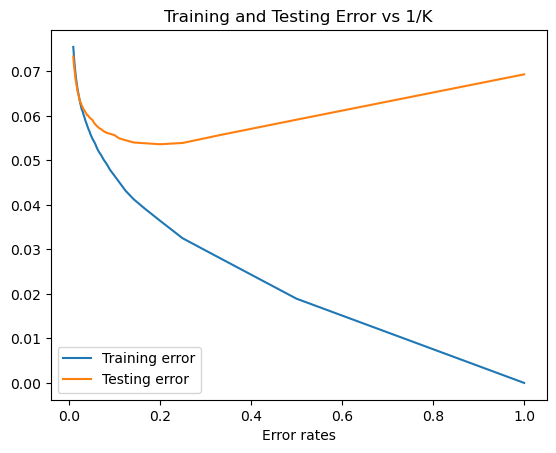

In [29]:
plt.plot(k_values_inverse, train_error, label = "Training error" )
plt.plot(k_values_inverse, test_error, label = "Testing error" )
plt.xlabel('1/K values')
plt.xlabel('Error rates')
plt.title('Training and Testing Error vs 1/K')
plt.legend()
plt.show()

In [30]:
def normalised_data(x):
    scale = preprocessing.MinMaxScaler()
    x_scaled = scale.fit_transform(x)
    return x_scaled


In [31]:
x_train_scaled = normalised_data(x_train)
x_test_scaled = normalised_data(x_test)

best_error, best_k, train_error, test_error, mse_train, mse_test = knn(k_values, x_train_scaled, y_train, x_test_scaled, y_test)
min_mse_test_error = min(mse_test)
min_mse_test_index = np.argmin(mse_test)
min_mse_train = mse_train[min_test_index]

print("MSE of KNN with normalization: ", min_mse_test_error.round(3))
print("Best K for KNN with normalization: ", best_k)

mse["KNN With Normalization"] = [min_mse_train.round(3), min_mse_test_error.round(3)]


MSE of KNN with normalization:  17.034
Best K for KNN with normalization:  9


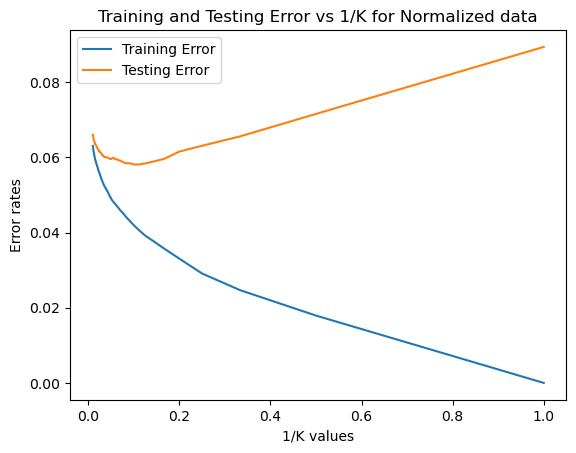

In [32]:
plt.plot(k_values_inverse, train_error, label='Training Error')
plt.plot(k_values_inverse, test_error, label='Testing Error')
plt.xlabel('1/K values')
plt.ylabel('Error rates')
plt.title('Training and Testing Error vs 1/K for Normalized data')
plt.legend()
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

In [33]:

data = []
for k, v in mse.items():
    data.append([k, v[0], v[1]])

data = pd.DataFrame(data, columns=['Predictors', 'Train MSE', 'Test MSE'])

print(data)


                                          Predictors  Train MSE   Test MSE
0  Predictors, Interactions and Quadratic Terms L...  17.900430  18.576028
1                   Predictors for Linear Regression  20.592037  21.176449
2   All significant predictors for Linear Regression  17.927101  18.642029
3                          KNN Without Normalization  10.601000  15.727000
4                             KNN With Normalization   9.603000  17.034000


### ISLR : 2.4.1
For each of parts (a) through (d), indicate whether we would generally expect the performance of a fexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a) The sample size n is extremely large, and the number of predictors p is small.**

Flexible model is better

Large sample size and small number of predictors can cause the inflexible model to underfit. Hence, a flexible model will perform better than an inflexible model.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**

Flexible model is worse

Small sample size and large number of predictors can cause the flexible model to overfit the limited data. Hence, an inflexible model will perform better than a flexible model.

**(c) The relationship between the predictors and response is highly non-linear.**

Flexible model is better

An inflexible model will not be able to adjust to the variances of a highly non-linear model and hence, a flexible model will perform better than a non-flexible model.

**(d) The variance of the error terms, i.e. $\sigma$ = Var(ε), is extremely high.**

Flexible model is worse
High variance indicates more noise meaning the flexible model will overfit. Hence, the inflexible model will perform better than a flexible model.

### ISLR 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

Obs.| X1 X2 X3  |       Y|
----|-----------|--------|
1   |0,3,0      |     Red|
2   |2,0,0      |     Red|
3   |0,1,3      |     Red|
4   |0,1,2      |   Green|
5   |−1,0,1     |   Green|
6   |1,1,1      |     Red|

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.



In [34]:
data_points = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
classes = ["Red", "Red", "Red", "Green", "Green", "Red"]
test_point = [[0,0,0]]
distances = pairwise.euclidean_distances(data_points, test_point)
data = [[i+1, data_points[i], distances[i][0].round(2), classes[i]] for i in range(len(data_points))]
print(tabulate(data, headers=['Index', 'Data Point', 'Distance from Test Point', 'Class'], tablefmt='fancy_grid'))

╒═════════╤══════════════╤════════════════════════════╤═════════╕
│   Index │ Data Point   │   Distance from Test Point │ Class   │
╞═════════╪══════════════╪════════════════════════════╪═════════╡
│       1 │ [0, 3, 0]    │                       3    │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       2 │ [2, 0, 0]    │                       2    │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       3 │ [0, 1, 3]    │                       3.16 │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       4 │ [0, 1, 2]    │                       2.24 │ Green   │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       5 │ [-1, 0, 1]   │                       1.41 │ Green   │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       6 │ [1, 1, 1]    │                       1.73 │ Red     │
╘═════════╧══════════════╧════════════════════════════╧═════════╛


**(b) What is our prediction with K = 1? Why?**

Green. For K = 1, the model will take the value for the nearest point  which is [-1, 0 ,1] as the neighbour which has Y value = Green. 
Red

**(c) What is our prediction with K = 3? Why?**

With K=3, we see that the closest 3 points are [2,0,0], [-1,0,1] and [1,1,1] whose classes are Red, Green and Red respectively. Hence, the test point is classified as Red.

**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or
small? Why?**

Small K
As K increases, the flexibility of the model decreases, indicating a straighter boundary. But since the boundary is highly non-linear, it would indicate a small K

### References

1. Statsmodels Documentation: https://www.statsmodels.org/stable/index.html

2. Cook’s Distance: https://www.analyticsvidhya.com/blog/2020/09/cooks-distance-in-influential-outliers-regression/

3. Polynomial Regression: https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

4. Formulas for Linear Regression: https://www.statsmodels.org/stable/example_formulas.html

5. Regression Diagnostics in Python: https://medium.com/analytics-vidhya/regression-diagnostics-in-python-5b6cda2469b

6. Interpreting Residual Plots for Regression: https://towardsdatascience.com/residual-analysis-for-regression-models-c6b42f35f0c1